- check target ratio

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

pd.options.display.max_columns = 100

In [2]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
sample = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [3]:
num_cols = train.columns.tolist()[1:-1]
cat_cols = 'EJ'
num_cols.remove(cat_cols)

In [4]:
int_denominators = {
 'AB': 0.004273,
 'AF': 0.00242,
 'AH': 0.008709,
 'AM': 0.003097,
 'AR': 0.005244,
 'AX': 0.008859,
 'AY': 0.000609,
 'AZ': 0.006302,
 'BC': 0.007028,
 'BD ': 0.00799,
 'BN': 0.3531,
 'BP': 0.004239,
 'BQ': 0.002605,
 'BR': 0.006049,
 'BZ': 0.004267,
 'CB': 0.009191,
 'CC': 6.12e-06,
 'CD ': 0.007928,
 'CF': 0.003041,
 'CH': 0.000398,
 'CL': 0.006365,
 'CR': 7.5e-05,
 'CS': 0.003487,
 'CU': 0.005517,
 'CW ': 9.2e-05,
 'DA': 0.00388,
 'DE': 0.004435,
 'DF': 0.000351,
 'DH': 0.002733,
 'DI': 0.003765,
 'DL': 0.00212,
 'DN': 0.003412,
 'DU': 0.0013794,
 'DV': 0.00259,
 'DY': 0.004492,
 'EB': 0.007068,
 'EE': 0.004031,
 'EG': 0.006025,
 'EH': 0.006084,
 'EL': 0.000429,
 'EP': 0.009269,
 'EU': 0.005064,
 'FC': 0.005712,
 'FD ': 0.005937,
 'FE': 0.007486,
 'FI': 0.005513,
 'FR': 0.00058,
 'FS': 0.006773,
 'GB': 0.009302,
 'GE': 0.004417,
 'GF': 0.004374,
 'GH': 0.003721,
 'GI': 0.002572
}
for k, v in int_denominators.items():
    train[k] = np.round(train[k]/v,1)

In [5]:
greeks["Condition"] = greeks["Beta"] + greeks["Gamma"] + greeks["Delta"]

In [6]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,49.0,1284724.5,9783.0,7231.0,1552.0,79.0,42.0,1557.0,790.5,516469.0,64.0,41434.0,58621.0,136209.0,60331.0,5138.0,92072.0,2950.0,1595.5,59.0,165.0,923.0,3953.0,236.0,393543.0,17805.0,66645.0,680.0,104.0,23704.0,39772.0,8692.0,3850.0,673.0,5162.0,1032.0,493.0,237870.0,156.0,B,71980.0,8472.0,756.0,2345.0,1729.0,1206023.5,650.0,7.298162,2997.5,14.0,1219.0,16439.0,458118.5,5949.0,27152.0,0.120343,1
1,007255e47698,34.0,404448.0,9783.0,11937.0,1552.0,410.0,42.0,2145.0,175.0,687976.0,55.0,36770.0,5664.0,8467.0,60331.0,3295.0,79201.0,6386.0,2001.0,79.0,175.0,14904.0,8119.0,246.0,407354.0,18247.0,40260.0,680.0,133.0,29371.0,35729.0,11000.0,4.0,673.0,3834.0,697.0,213.0,184446.0,0.5,A,254371.0,10294.0,10320.0,3007.0,50.0,906359.0,1879.0,0.173229,857.0,84.0,999.0,16439.0,6397248.0,7830.0,12493.0,21.978000,0
2,013f2bd269f5,110.0,1088887.0,9783.0,10449.0,1552.0,760.0,42.0,2035.0,175.0,642776.0,75.0,30429.0,84192.0,79706.0,60331.0,3543.0,81021.5,10842.0,1768.0,91.0,165.0,9338.0,11289.0,183.0,233257.0,18252.5,72475.0,680.0,77.0,31887.5,30882.0,8222.0,935.0,673.0,8206.0,1105.5,2021.0,247979.5,62.0,B,254371.0,8472.0,1064.5,39252.0,1473.0,1113933.5,2109.0,7.709560,1682.0,177.0,3986.0,20061.0,3126876.5,7531.0,13683.0,0.196941,0
3,043ac50845d5,59.0,1578368.5,13802.0,24899.0,1552.0,416.0,42.0,1754.0,175.0,521862.0,67.0,55976.0,4242.0,109360.0,60331.0,1654.0,117301.0,11120.0,772.0,73.0,220.0,8481.0,11791.5,131.0,234026.0,12184.5,44331.0,680.0,107.0,37138.0,33760.0,7138.0,1925.0,673.0,11577.0,1045.0,946.0,2604407.0,101.0,B,73833.0,8472.0,6185.5,10382.0,1328.0,1464836.5,2694.0,6.122162,857.0,42.0,1992.0,18659.0,478798.0,10736.0,35184.0,0.155829,0
4,044fb8a146ec,89.0,1542582.0,9783.0,4554.0,1552.0,445.0,90.0,539.0,14535.0,716988.0,68.0,76562.0,57473.0,1004275.0,60331.0,8945.0,87658.0,9163.0,10042.0,64.0,165.0,9242.0,9098.0,150.0,374080.0,19089.0,45136.0,680.0,76.0,26008.0,24924.0,7626.0,830.0,673.0,2018.0,1040.0,866.0,232972.0,27.0,B,254371.0,9925.0,10099.0,5095.0,720.0,2163779.0,2479.0,8.153058,83623.0,18.0,1764.0,33079.0,1948873.0,12196.0,14099.0,0.096614,1


In [7]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,6.170000e+02,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,6.170000e+02,617.000000,617.000000,557.000000,6.170000e+02,6.170000e+02,615.000000,614.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,6.170000e+02,617.000000,557.000000,617.000000,6.170000e+02,616.000000,617.000000,6.170000e+02,617.000000,616.000000,6.170000e+02,615.000000,617.000000,617.000000,6.170000e+02,617.000000,617.000000,616.000000,617.000000
mean,111.666126,1.447113e+06,13620.910859,12582.677472,1931.396272,625.982172,99.047002,1676.681524,1145.846840,6.696356e+05,60.661264,54569.998379,37746.156194,2.013776e+05,1.290444e+05,8389.092683,112549.264658,11383.922204,3696.502431,76.921394,220.543760,9896.821718,10587.206645,250.823339,295278.841167,13177.403566,90620.360616,1805.936791,134.285251,39036.414100,44714.800648,7728.771475,1307.017857,743.177472,5874.663695,1283.630470,760.302269,2.873441e+05,50.149109,162197.192998,11334.632901,1.364870e+04,12489.762987,1167.270665,1.376811e+06,1834.042950,5.433199,6.092940e+03,62.232520,2228.000000,29820.010535,3.356103e+06,8462.702593,19667.354943,8.530961,0.175041
std,109.615804,9.505466e+05,14678.947104,22514.764634,2005.888114,288.034270,684.428383,690.359477,9272.473358,3.781385e+05,9.850688,43404.695656,37036.226875,1.252322e+06,4.866115e+05,17304.896285,43136.331111,6506.701607,4462.720613,37.206698,301.996809,3749.265786,4951.633915,97.646753,159195.573936,5466.723710,71645.010717,5448.386328,41.342435,22864.387635,13322.257861,2356.044743,6549.746912,573.187088,4033.098562,877.232798,510.628652,2.971332e+05,303.665162,89873.442038,7384.358580,7.705116e+04,28983.113555,10906.899363,1.513665e+06,532.201244,11.496257,8.652060e+04,192.730719,1074.167573,32642.409818,4.424545e+06,2650.964528,14100.408797,10.327010,0.380310
min,19.000000,7.958400e+04,9783.000000,1026.000000,1552.000000,79.000000,42.000000,539.000000,175.000000,2.119680e+05,28.000000,17209.000000,511.000000,8.467000e+03,6.033100e+04,1360.000000,28901.000000,2950.000000,168.000000,8.000000,165.000000,923.000000,3953.000000,25.000000,76420.000000,1780.000000,8117.000000,680.000000,15.000000,15998.000000,4880.000000,1858.000000,4.000000,673.000000,179.000000,697.000000,71.000000,3.080400e+04,0.500000,12575.000000,8472.000000,7.560000e+02,1319.000000,50.000000,2.088080e+05,650.000000,0.173229,8.570000e+02,10.000000,441.000000,16439.000000,2.981000e+03,2535.000000,349.000000,0.001129,0.000000
25%,59.000000,9.079940e+05,9783.000000,3962.000000,1552.000000,466.000000,42.000000,1290.000000,175.000000,5.201130e+05,55.000000,37001.000000,10685.000000,7.025800e+04,6.033100e+04,2537.000000,92105.875000,8164.000000,1666.000000,59.000000,165.000000,7861.000000,8541.000000,194.000000,76420.000000,9779.000000,42574.000000,680.000000,108.000000,27278.500000,36902.000000,6122.000000,4.000000,673.000000,3276.000000,844.000000,409.000000,1.844250e+05,0.500000,72092.000000,8472.000000,8.540000e+02,4519.500000,50.000000,6.899100e+05,1546.000000,0.173229,8.570000e+02,10.000000,1509.000000,16439.000000,6.399160e+05,6728.000000,8947.000000,0.124392,0.000000
50%,83.000000,1.289388e+06,9783.000000,6630.000000,1552.000000,568.000000,42.000000,1660.000000,175.000000,6.255270e+05,60.000000,45744.000000,23663.000000,1.037225e+05,6.033100e+04,4630.000000,107633.250000,10068.000000,3000.000000,70.000000,165.000000,9744.000000,9990.000000,245.000000,391512.000000,12675.500000,69337.000000,680.000000,131.000000,34542.000000,45408.000000,7400.000000,182.500000,673.000000,4818.000000,1153.000000,649.000000,2.479365e+05,14.000000,167714.000000,8472.000000,4.471000e+03,6371.500000,315.000000,9.8

In [8]:
train.shape

(617, 58)

In [9]:
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon,Condition
0,000ff2bfdfe9,B,C,G,D,3/19/2019,CGD
1,007255e47698,A,C,M,B,Unknown,CMB
2,013f2bd269f5,A,C,M,B,Unknown,CMB
3,043ac50845d5,A,C,M,B,Unknown,CMB
4,044fb8a146ec,D,B,F,B,3/25/2020,BFB


In [10]:
train = pd.merge(train, greeks[["Id", "Epsilon", "Beta", "Gamma", "Delta", "Condition"]], on = "Id", how = "inner")
train.shape

(617, 63)

In [11]:
train["Epsilon"] = train["Epsilon"].map(lambda x: datetime.strptime(x,'%m/%d/%Y') if x != "Unknown" else np.nan)
train["year"] = train["Epsilon"].map(lambda x: x.year)
train["month"] = train["Epsilon"].map(lambda x: x.month)
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,Epsilon,Beta,Gamma,Delta,Condition,year,month
0,000ff2bfdfe9,49.0,1284724.5,9783.0,7231.0,1552.0,79.0,42.0,1557.0,790.5,516469.0,64.0,41434.0,58621.0,136209.0,60331.0,5138.0,92072.0,2950.0,1595.5,59.0,165.0,923.0,3953.0,236.0,393543.0,17805.0,66645.0,680.0,104.0,23704.0,39772.0,8692.0,3850.0,673.0,5162.0,1032.0,493.0,237870.0,156.0,B,71980.0,8472.0,756.0,2345.0,1729.0,1206023.5,650.0,7.298162,2997.5,14.0,1219.0,16439.0,458118.5,5949.0,27152.0,0.120343,1,2019-03-19,C,G,D,CGD,2019.0,3.0
1,007255e47698,34.0,404448.0,9783.0,11937.0,1552.0,410.0,42.0,2145.0,175.0,687976.0,55.0,36770.0,5664.0,8467.0,60331.0,3295.0,79201.0,6386.0,2001.0,79.0,175.0,14904.0,8119.0,246.0,407354.0,18247.0,40260.0,680.0,133.0,29371.0,35729.0,11000.0,4.0,673.0,3834.0,697.0,213.0,184446.0,0.5,A,254371.0,10294.0,10320.0,3007.0,50.0,906359.0,1879.0,0.173229,857.0,84.0,999.0,16439.0,6397248.0,7830.0,12493.0,21.978000,0,NaT,C,M,B,CMB,NaN,NaN
2,013f2bd269f5,110.0,1088887.0,9783.0,10449.0,1552.0,760.0,42.0,2035.0,175.0,642776.0,75.0,30429.0,84192.0,79706.0,60331.0,3543.0,81021.5,10842.0,1768.0,91.0,165.0,9338.0,11289.0,183.0,233257.0,18252.5,72475.0,680.0,77.0,31887.5,30882.0,8222.0,935.0,673.0,8206.0,1105.5,2021.0,247979.5,62.0,B,254371.0,8472.0,1064.5,39252.0,1473.0,1113933.5,2109.0,7.709560,1682.0,177.0,3986.0,20061.0,3126876.5,7531.0,13683.0,0.196941,0,NaT,C,M,B,CMB,NaN,NaN
3,043ac50845d5,59.0,1578368.5,13802.0,24899.0,1552.0,416.0,42.0,1754.0,175.0,521862.0,67.0,55976.0,4242.0,109360.0,60331.0,1654.0,117301.0,11120.0,772.0,73.0,220.0,8481.0,11791.5,131.0,234026.0,12184.5,44331.0,680.0,107.0,37138.0,33760.0,7138.0,1925.0,673.0,11577.0,1045.0,946.0,2604407.0,101.0,B,73833.0,8472.0,6185.5,10382.0,1328.0,1464836.5,2694.0,6.122162,857.0,42.0,1992.0,18659.0,478798.0,10736.0,35184.0,0.155829,0,NaT,C,M,B,CMB,NaN,NaN
4,044fb8a146ec,89.0,1542582.0,9783.0,4554.0,1552.0,445.0,90.0,539.0,14535.0,716988.0,68.0,76562.0,57473.0,1004275.0,60331.0,8945.0,87658.0,9163.0,10042.0,64.0,165.0,9242.0,9098.0,150.0,374080.0,19089.0,45136.0,680.0,76.0,26008.0,24924.0,7626.0,830.0,673.0,2018.0,1040.0,866.0,232972.0,27.0,B,254371.0,9925.0,10099.0,5095.0,720.0,2163779.0,2479.0,8.153058,83623.0,18.0,1764.0,33079.0,1948873.0,12196.0,14099.0,0.096614,1,2020-03-25,B,F,B,BFB,2020.0,3.0


In [12]:
train.groupby("year")["Class"].mean()

year
2012.0    0.000000
2014.0    0.571429
2016.0    1.000000
2017.0    1.000000
2018.0    0.372549
2019.0    0.284483
2020.0    0.094972
Name: Class, dtype: float64

In [13]:
train.groupby("year")["Class"].sum()

year
2012.0     0
2014.0     4
2016.0     1
2017.0     1
2018.0    19
2019.0    66
2020.0    17
Name: Class, dtype: int64

In [14]:
train["year"].value_counts()

2019.0    232
2020.0    179
2018.0     51
2014.0      7
2012.0      2
2016.0      1
2017.0      1
Name: year, dtype: int64

In [15]:
train[train.year != 2020]["Class"].mean(), train[train.year == 2020]["Class"].mean()

(0.20776255707762556, 0.09497206703910614)

In [16]:
train.isnull().sum()

Id             0
AB             0
AF             0
AH             0
AM             0
            ... 
Gamma          0
Delta          0
Condition      0
year         144
month        144
Length: 65, dtype: int64

In [17]:
train.Class.mean()

0.17504051863857376

In [18]:
train[train.year==2020]["month"].value_counts().sort_index()

1.0     9
2.0     7
3.0     3
4.0    17
5.0    24
6.0    20
7.0    37
8.0     4
9.0    58
Name: month, dtype: int64

In [19]:
train[train.year==2020].groupby("month")["Class"].mean()

month
1.0    0.222222
2.0    0.142857
3.0    0.333333
4.0    0.000000
5.0    0.083333
6.0    0.150000
7.0    0.135135
8.0    0.250000
9.0    0.034483
Name: Class, dtype: float64

In [20]:
train[(train.year==2020) & (train.month >=1)]["Class"].mean()

0.09497206703910614

In [21]:
condition_counts = greeks["Condition"].value_counts().reset_index()
condition_counts.columns = ["Condition", "Count"]

In [22]:
condition_class_mean = train.groupby("Condition")["Class"].mean().reset_index()
condition_class_mean

,Condition,Class
0,AAA,1.0
1,ABA,1.0
2,AFA,1.0
3,AHA,1.0
4,BAB,1.0
5,BBB,1.0
6,BEA,1.0
7,BEB,1.0
8,BFA,1.0
9,BFB,1.0


In [23]:
pd.merge(condition_counts, condition_class_mean, on = "Condition")

,Condition,Count,Class
0,CMB,242,0.0
1,BMB,97,0.0
2,CNB,63,0.0
3,BMA,51,0.0
4,CMC,44,0.0
5,BHB,20,1.0
6,CHC,12,1.0
7,CMD,11,0.0
8,BHA,10,1.0
9,BFB,8,1.0


In [24]:
beta_map = {'A': 0, 'B': 1, 'C': 2} 
gamma_map = {'A': 0, 'B': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'M': 6, 'N': 7}
delta_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3} 

train['Beta'] = train['Beta'].map(beta_map)
train['Gamma'] = train['Gamma'].map(gamma_map)
train['Delta'] = train['Delta'].map(delta_map)

In [25]:
train.groupby("Beta")["Class"].mean()

Beta
0    1.000000
1    0.267327
2    0.113022
Name: Class, dtype: float64

In [26]:
train["Beta"].value_counts()

2    407
1    202
0      8
Name: Beta, dtype: int64

In [27]:
train.groupby("Gamma")["Class"].mean()

Gamma
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    0.0
7    0.0
Name: Class, dtype: float64

In [28]:
train["Gamma"].value_counts().sort_index()

0     11
1     18
2      8
3     10
4      8
5     53
6    445
7     64
Name: Gamma, dtype: int64

In [29]:
train.corr().head(60)

/tmp/ipykernel_20/216487320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().head(60)


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,Beta,Gamma,Delta,year,month
AB,1.000000,0.350231,0.249246,0.530687,0.157712,0.471912,0.011004,0.158569,0.331736,0.278920,0.246410,0.412869,0.237270,0.148966,0.375898,0.081112,0.233556,0.437661,0.299386,0.426383,0.040467,-0.005741,0.158294,-0.066341,-0.109078,-0.183127,-0.050492,0.299234,-0.204446,0.343071,-0.137980,0.195190,0.059821,0.036950,0.016847,0.279021,0.058040,0.124917,0.072192,-0.023105,0.033086,-0.034322,0.290276,0.067027,0.041684,0.004967,0.169934,0.017990,0.036913,0.318741,0.003327,-0.017192,0.148456,0.002903,-0.061601,0.280612,-0.089208,-0.289499,-0.102081,-0.158048,-0.033446
AF,0.350231,1.000000,0.044140,0.183961,0.044917,0.248439,0.039417,0.219172,0.058831,0.045430,0.131428,0.241027,0.309300,0.018409,0.067106,0.013128,0.091546,0.181395,0.066975,0.126804,-0.030457,-0.035850,0.054071,0.132456,-0.118106,-0.127525,-0.113353,0.080841,-0.027899,0.330857,0.057947,0.255259,0.110287,-0.018922,-0.006084,0.141196,-0.045524,0.096498,0.116330,0.114897,-0.052378,-0.001646,0.060819,0.088511,0.080458,0.021914,0.148289,0.021009,-0.003108,0.079993,0.076449,-0.159796,0.187105,0.140935,-0.127870,0.302638,-0.323287,-0.315282,-0.104755,0.001899,-0.066792
AH,0.249246,0.044140,1.000000,0.128268,0.749794,0.039324,0.055385,0.095627,0.366910,0.209508,0.055154,0.223916,0.131165,0.011948,0.440221,0.077926,0.162371,0.131419,0.164696,0.677612,0.693637,-0.018642,0.632552,0.070736,0.062493,0.260513,0.143512,0.105094,0.109871,0.148272,-0.050009,-0.026802,-0.032162,0.746715,0.002736,0.705110,0.175891,0.027994,-0.023344,-0.067320,0.678742,-0.010162,0.217062,-0.010942,-0.006100,0.035902,-0.022822,-0.009112,0.018328,0.159666,0.011332,-0.029422,-0.037542,-0.073142,0.029175,0.044645,0.029704,-0.069363,-0.004278,-0.099999,0.035197
AM,0.530687,0.183961,0.128268,1.000000,0.175212,0.225382,0.081666,0.131885,0.329658,0.277908,0.158404,0.178260,0.260038,0.011272,0.333209,0.004800,0.160961,0.249581,0.370031,0.250566,-0.029723,-0.026143,0.032254,0.001013,-0.031086,-0.255359,-0.062401,0.321732,-0.202972,0.347550,-0.091830,0.059895,0.038487,-0.036929,-0.040123,0.082645,-0.020696,0.043258,0.010132,0.055216,-0.042153,-0.019131,0.027564,0.002447,0.077170,-0.038974,0.187974,-0.009183,0.040846,0.217443,-0.012176,-0.019639,0.089008,0.100873,-0.079717,0.239170,-0.145127,-0.183503,-0.083679,-0.181583,-0.009964
AR,0.157712,0.044917,0.749794,0.175212,1.000000,0.011715,0.099947,0.099282,0.073730,-0.002509,0.048671,0.177579,0.184149,0.007044,0.137466,0.009110,-0.021310,0.020578,-0.002361,0.660409,0.745504,-0.153166,0.720853,0.108454,0.076620,0.281715,0.105616,0.301627,0.174468,0.318558,-0.010439,-0.028360,-0.006020,0.823012,-0.047274,0.741000,0.175292,0.027764,-0.009067,-0.051864,0.754615,0.014996,-0.006601,0.004419,0.028447,0.018049,0.080164,-0.007933,0.068271,0.002816,0.034682,0.027927,-0.120285,0.074428,0.028150,0.064380,0.018594,-0.022689,-0.001519,-0.061752,0.063108
AX,0.471912,0.248439,0.039324,0.225382,0.011715,1.000000,0.016315,0.269728,0.079799,0.124581,0.143351,0.428020,0.183762,0.038888,0.117972,0.016100,0.180710,0.247612,0.197018,0.176463,0.054424,-0.063454,0.092060,0.080091,-0.086019,-0.032053,0.043023,0.024006,-0.038901,0.183382,-0.015662,0.176643,-0.030058,0.024087,0.028683,0.110120,0.032320,0.158917,-0.030023,0.112591,-0.028936,-0.014398,0.173032,-0.031413,0.012873,0.114727,0.020747,-0.014095,0.045893,0.233188,0.099148,0.075500,0.119736,0.046596,-0.004384,0.097616,-0.047890,-0.110911,-0.072011,-0.108678,-0.024965
AY,0.011004,0.039417,0.055385,0.081666,0.099947,0.016315,1.000000,0.036790,0.132495,0.506917,0.042365,0.027618,0.116206,0.000098,0.118981,-0.008312,0.008158,0.028359,0.024272,0.150066,0.055311,-0.063460,0.030026,0.099241,0.068402,-0.054766,-0.019275,0.001266,-0.001491,0.138382,0.013437,-0.022305,-0.012687,0.064777,0.001053,0.083718,-0.030944,-0.007844,-0.010550,0.041698,0.077790,

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, kurtosis

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
features_std = train.loc[:,num_cols].apply(lambda x: np.std(x)).sort_values(
    ascending=False)
f_std = train[features_std.iloc[:20].index.tolist()]

with pd.option_context('mode.use_inf_as_na', True):
    features_skew = np.abs(train.loc[:,num_cols].apply(lambda x: np.abs(skew(x))).sort_values(
        ascending=False)).dropna()
skewed = train[features_skew.iloc[:20].index.tolist()]

with pd.option_context('mode.use_inf_as_na', True):
    features_kurt = np.abs(train.loc[:,num_cols].apply(lambda x: np.abs(kurtosis(x))).sort_values(
        ascending=False)).dropna()
kurt_f = train[features_kurt.iloc[:20].index.tolist()]

In [32]:
def feat_dist(df, cols, rows=3, columns=3, title=None, figsize=(25, 20)):
    
    fig, axes = plt.subplots(rows, columns, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()

    for i, j in zip(cols, axes):
        sns.kdeplot(df, x=i, ax=j, hue='Class', linewidth=1.5, linestyle='--')
        
        (mu, sigma) = norm.fit(df[i])
        
        xmin, xmax = j.get_xlim()[0], j.get_xlim()[1]
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        j.plot(x, p, 'k', linewidth=2)
        
        j.set_title('Dist of {0} Norm Fit: $\mu=${1:.2g}, $\sigma=${2:.2f}'.format(i, mu, sigma), weight='bold')
        j.legend(labels=[f'Class0_{i}', f'Class1_{i}', 'Normal Dist'])
        fig.suptitle(f'{title}', fontsize=24, weight='bold')

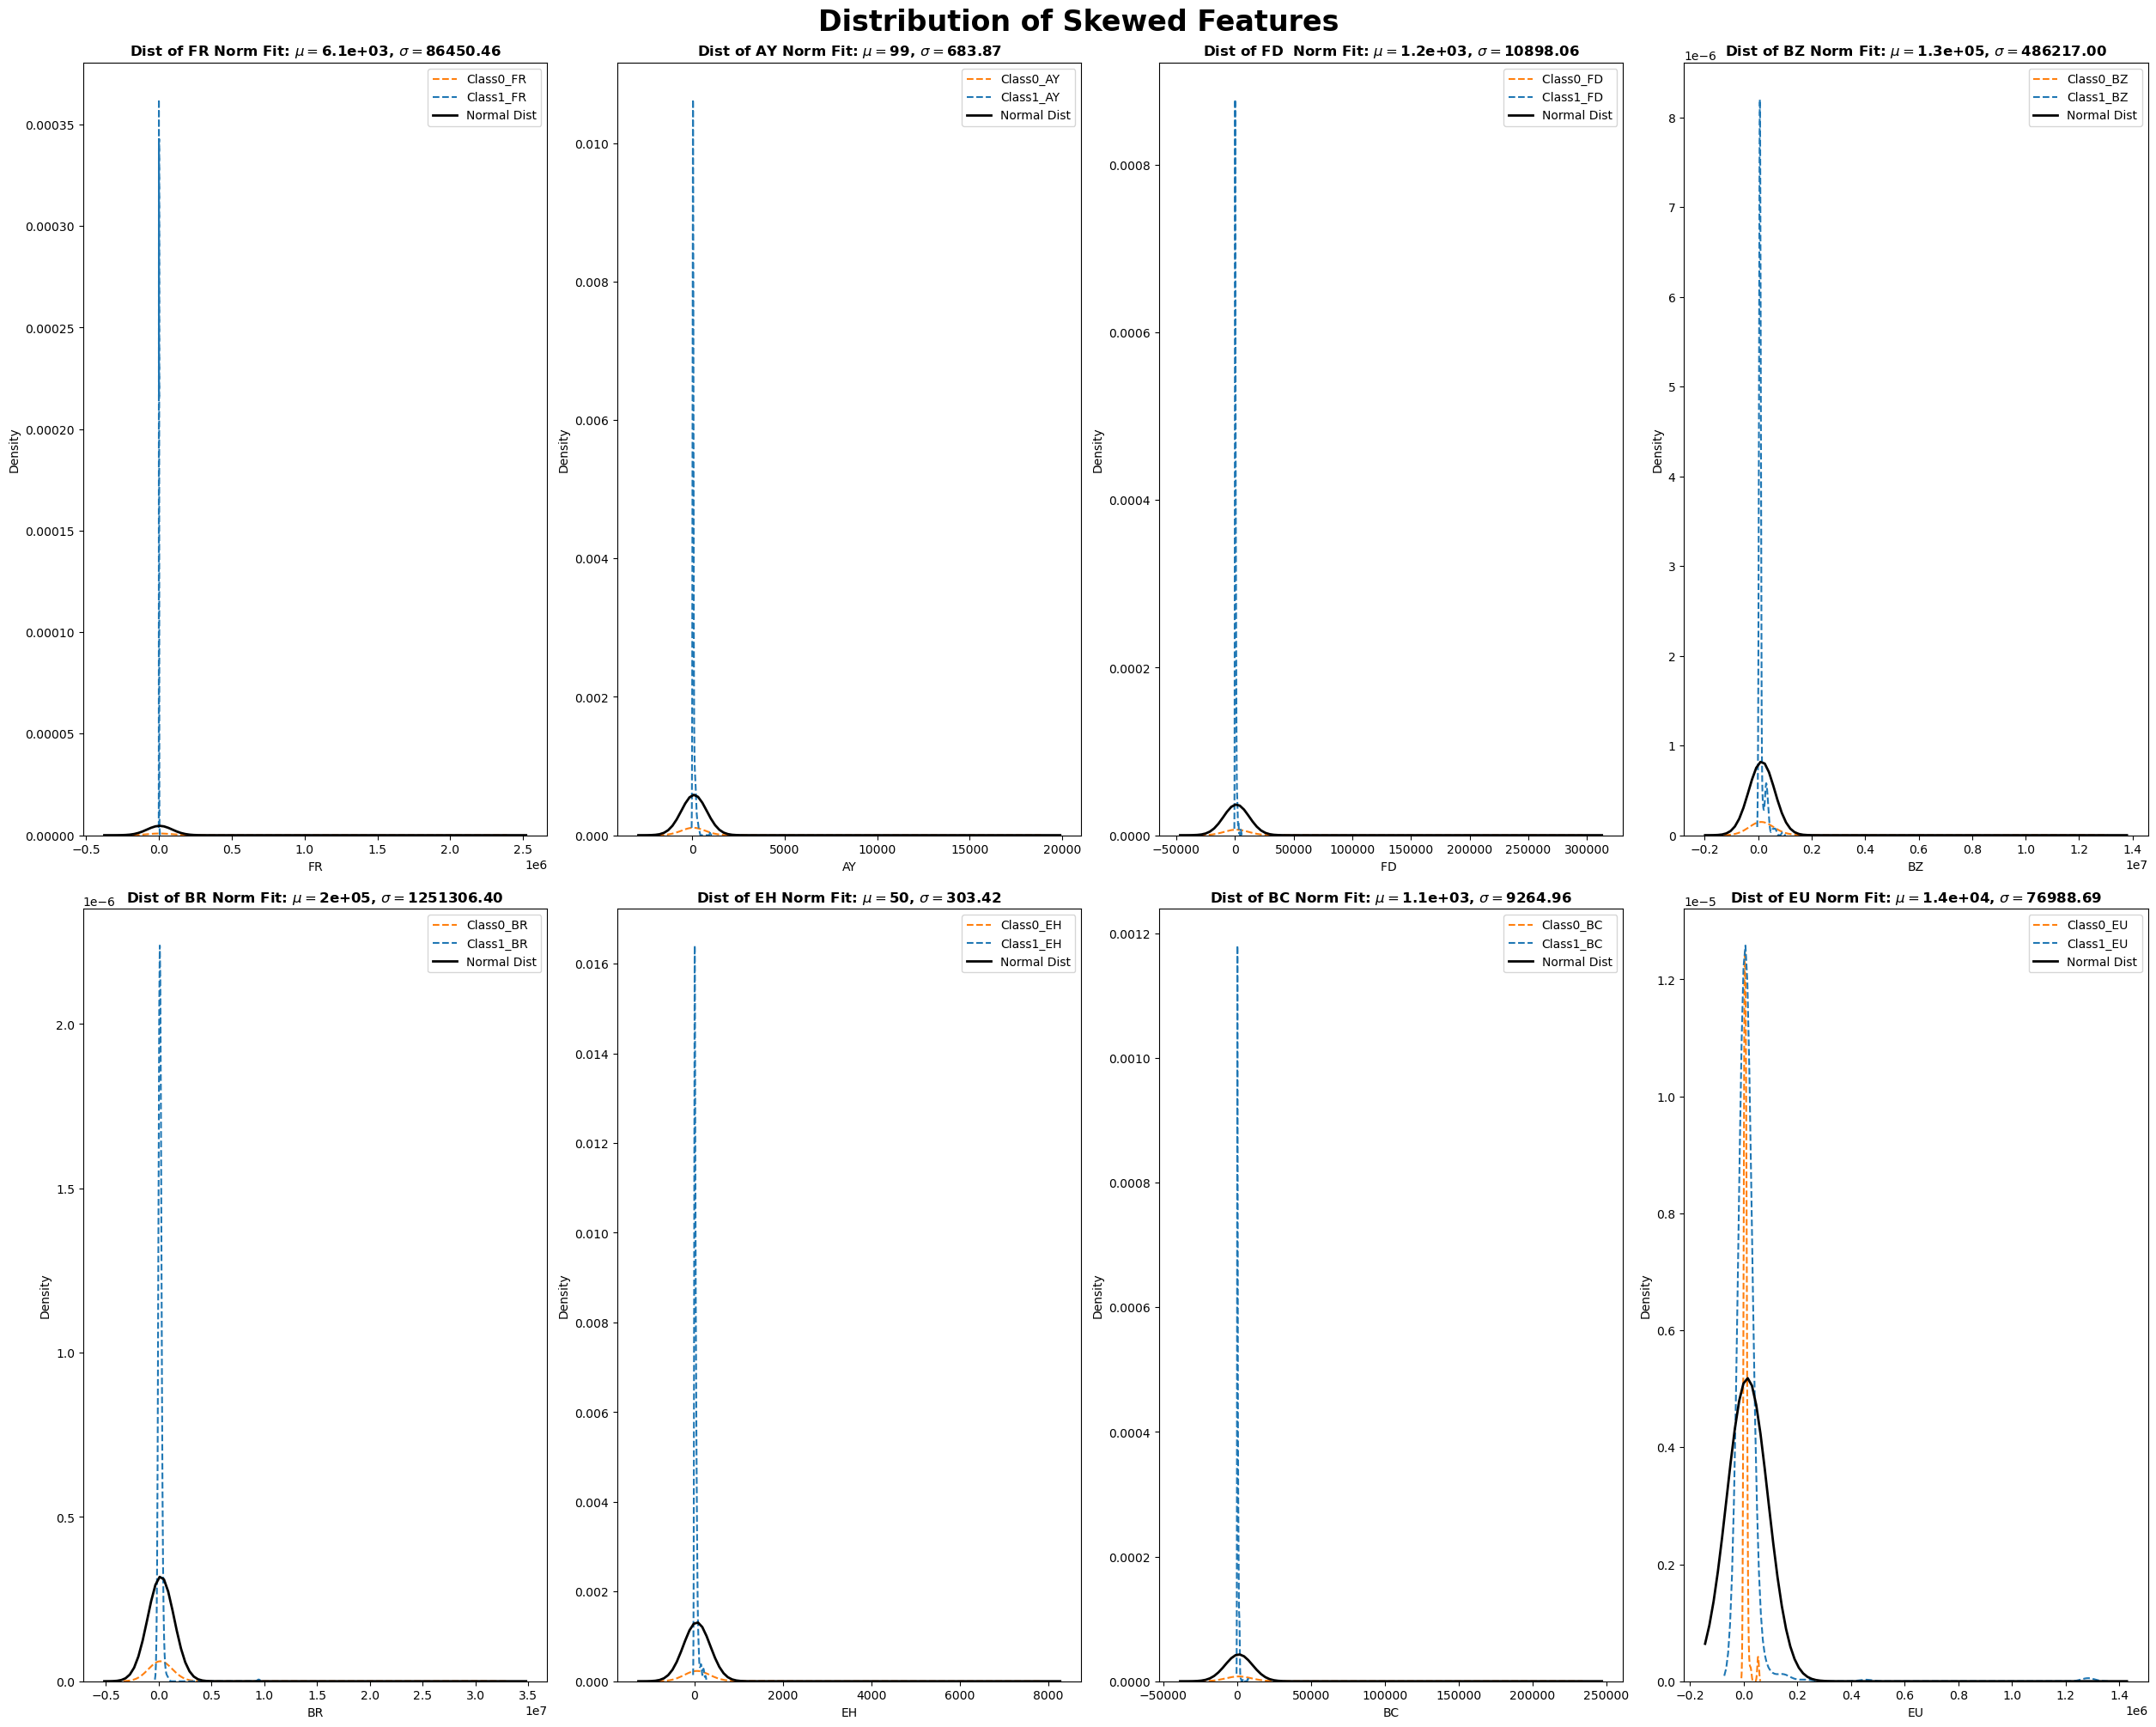

In [33]:
feat_dist(train, skewed.columns.tolist(), rows=2, columns=4, title='Distribution of Skewed Features')

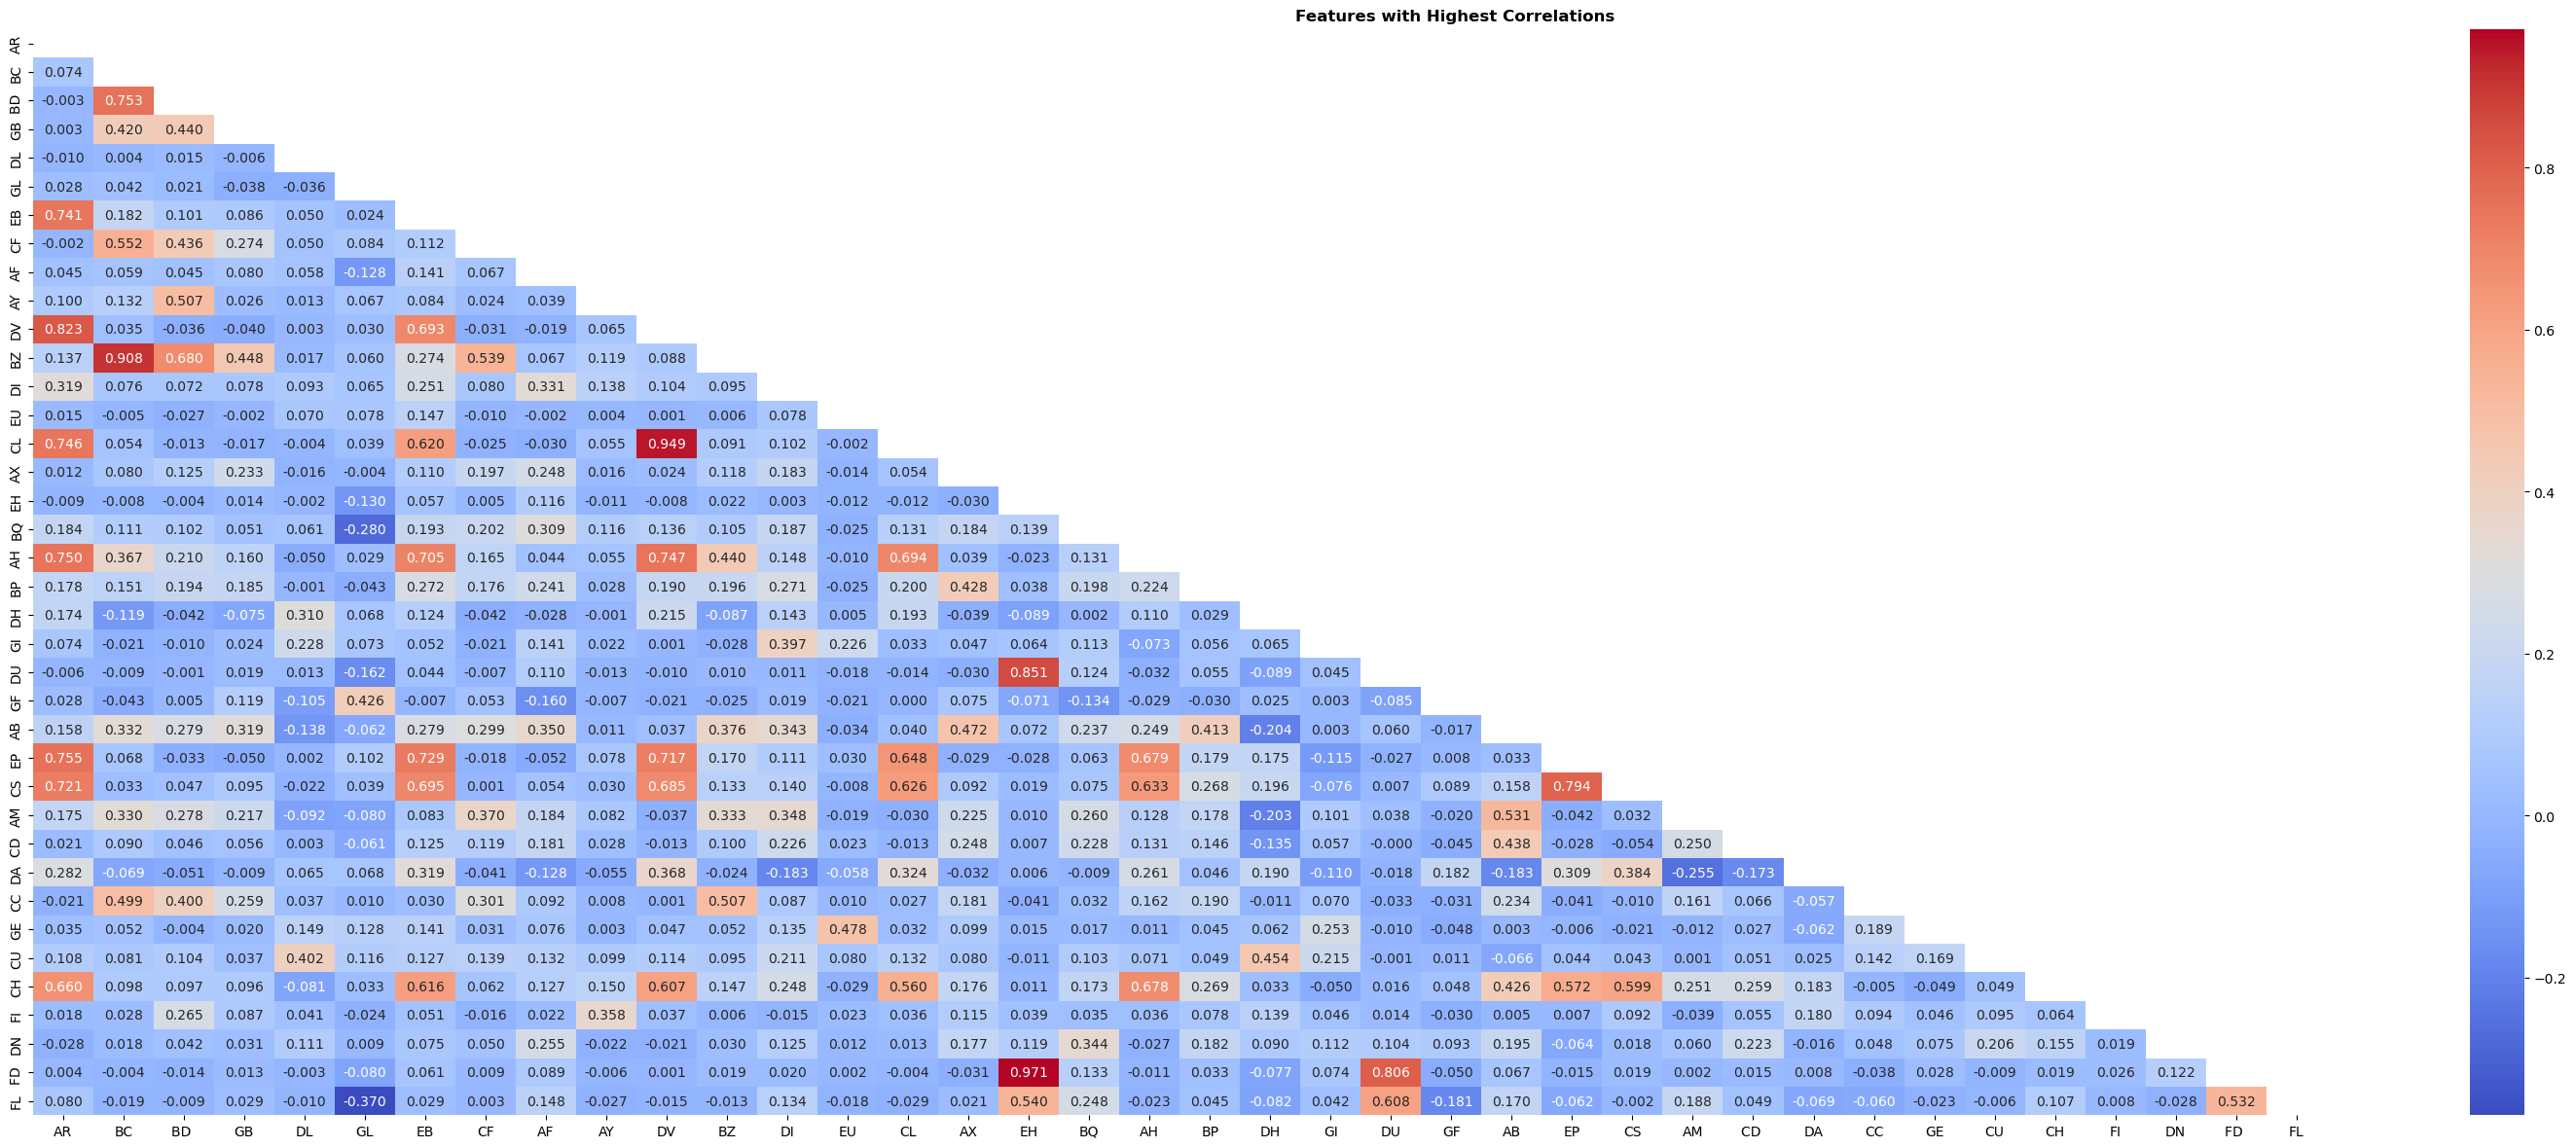

In [34]:
correlations = train.loc[:,num_cols].corr().abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']] #preventing 1.0 corr
corr_max=correlations.level_0.head(150).tolist()
corr_max=list(set(corr_max)) #removing duplicates

corr_min=correlations.level_0.tail(34).tolist()
corr_min=list(set(corr_min)) #removing duplicates


correlation_train = train.loc[:,corr_max].corr()
mask = np.triu(correlation_train.corr())

plt.figure(figsize=(30, 12))
sns.heatmap(correlation_train,
            mask=mask,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            linewidths=0.00,
            cbar=True)


plt.suptitle('Features with Highest Correlations',  weight='bold')
plt.tight_layout()